Author: Kayleb Klapp 

Date: 11 May, 2025 


In [ ]:
import sklearn
import sklearn.model_selection
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sea

In [ ]:

data_file = "output.csv"
all_data = pd.read_csv(data_file)
train_df, test_df = train_test_split(all_data, test_size=0.2)

Taking a birds eye view of the dataset. There are a ton of features here. All of them are candidates, but not all of them are as good as others. There's also likely to be a lot of colinearity in all of them, since many of the features are partially composed of other features. For example, supply cap is increased by building buildings.

Lets take a handful of features that intuitively feel like they will be good predictors of advantage.

For each player:
total_army_value
upgrade_count
total_minerals_collected

This feels like a good balance of economic factors and army factors. Lets move forward with these 5 features.

In [49]:
model_1_features = [
    "p1_upgrade_count", "p1_total_minerals_collected", "p1_total_army_value", 
    "p2_upgrade_count", "p2_total_minerals_collected", "p2_total_army_value"]
model_1_label = ["winner"]
train_model1_df = train_df[model_1_features + model_1_label]



In [35]:

print("All Covariance Values for winner=1")
print(train_model1_df[train_model1_df["winner"]==1].cov(numeric_only=True))

print("All Covariance Values for winner=2")
print(train_model1_df[train_model1_df["winner"]==2].cov(numeric_only=True))

All Covariance Values for winner=1
                             p1_upgrade_count  p1_total_minerals_collected  \
p1_upgrade_count                    17.965203                 4.477548e+04   
p1_total_minerals_collected      44775.475180                 1.291268e+08   
p1_total_army_value              13049.881964                 3.632920e+07   
p2_upgrade_count                    14.087355                 3.868179e+04   
p2_total_minerals_collected      40135.015481                 1.139677e+08   
p2_total_army_value               9457.758411                 2.663688e+07   
winner                               0.000000                 0.000000e+00   

                             p1_total_army_value  p2_upgrade_count  \
p1_upgrade_count                    1.304988e+04         14.087355   
p1_total_minerals_collected         3.632920e+07      38681.794770   
p1_total_army_value                 1.349404e+07      11090.513363   
p2_upgrade_count                    1.109051e+04         14.

Covariance is suprisingly different between the classes. This immediately rules out the use of LDA.

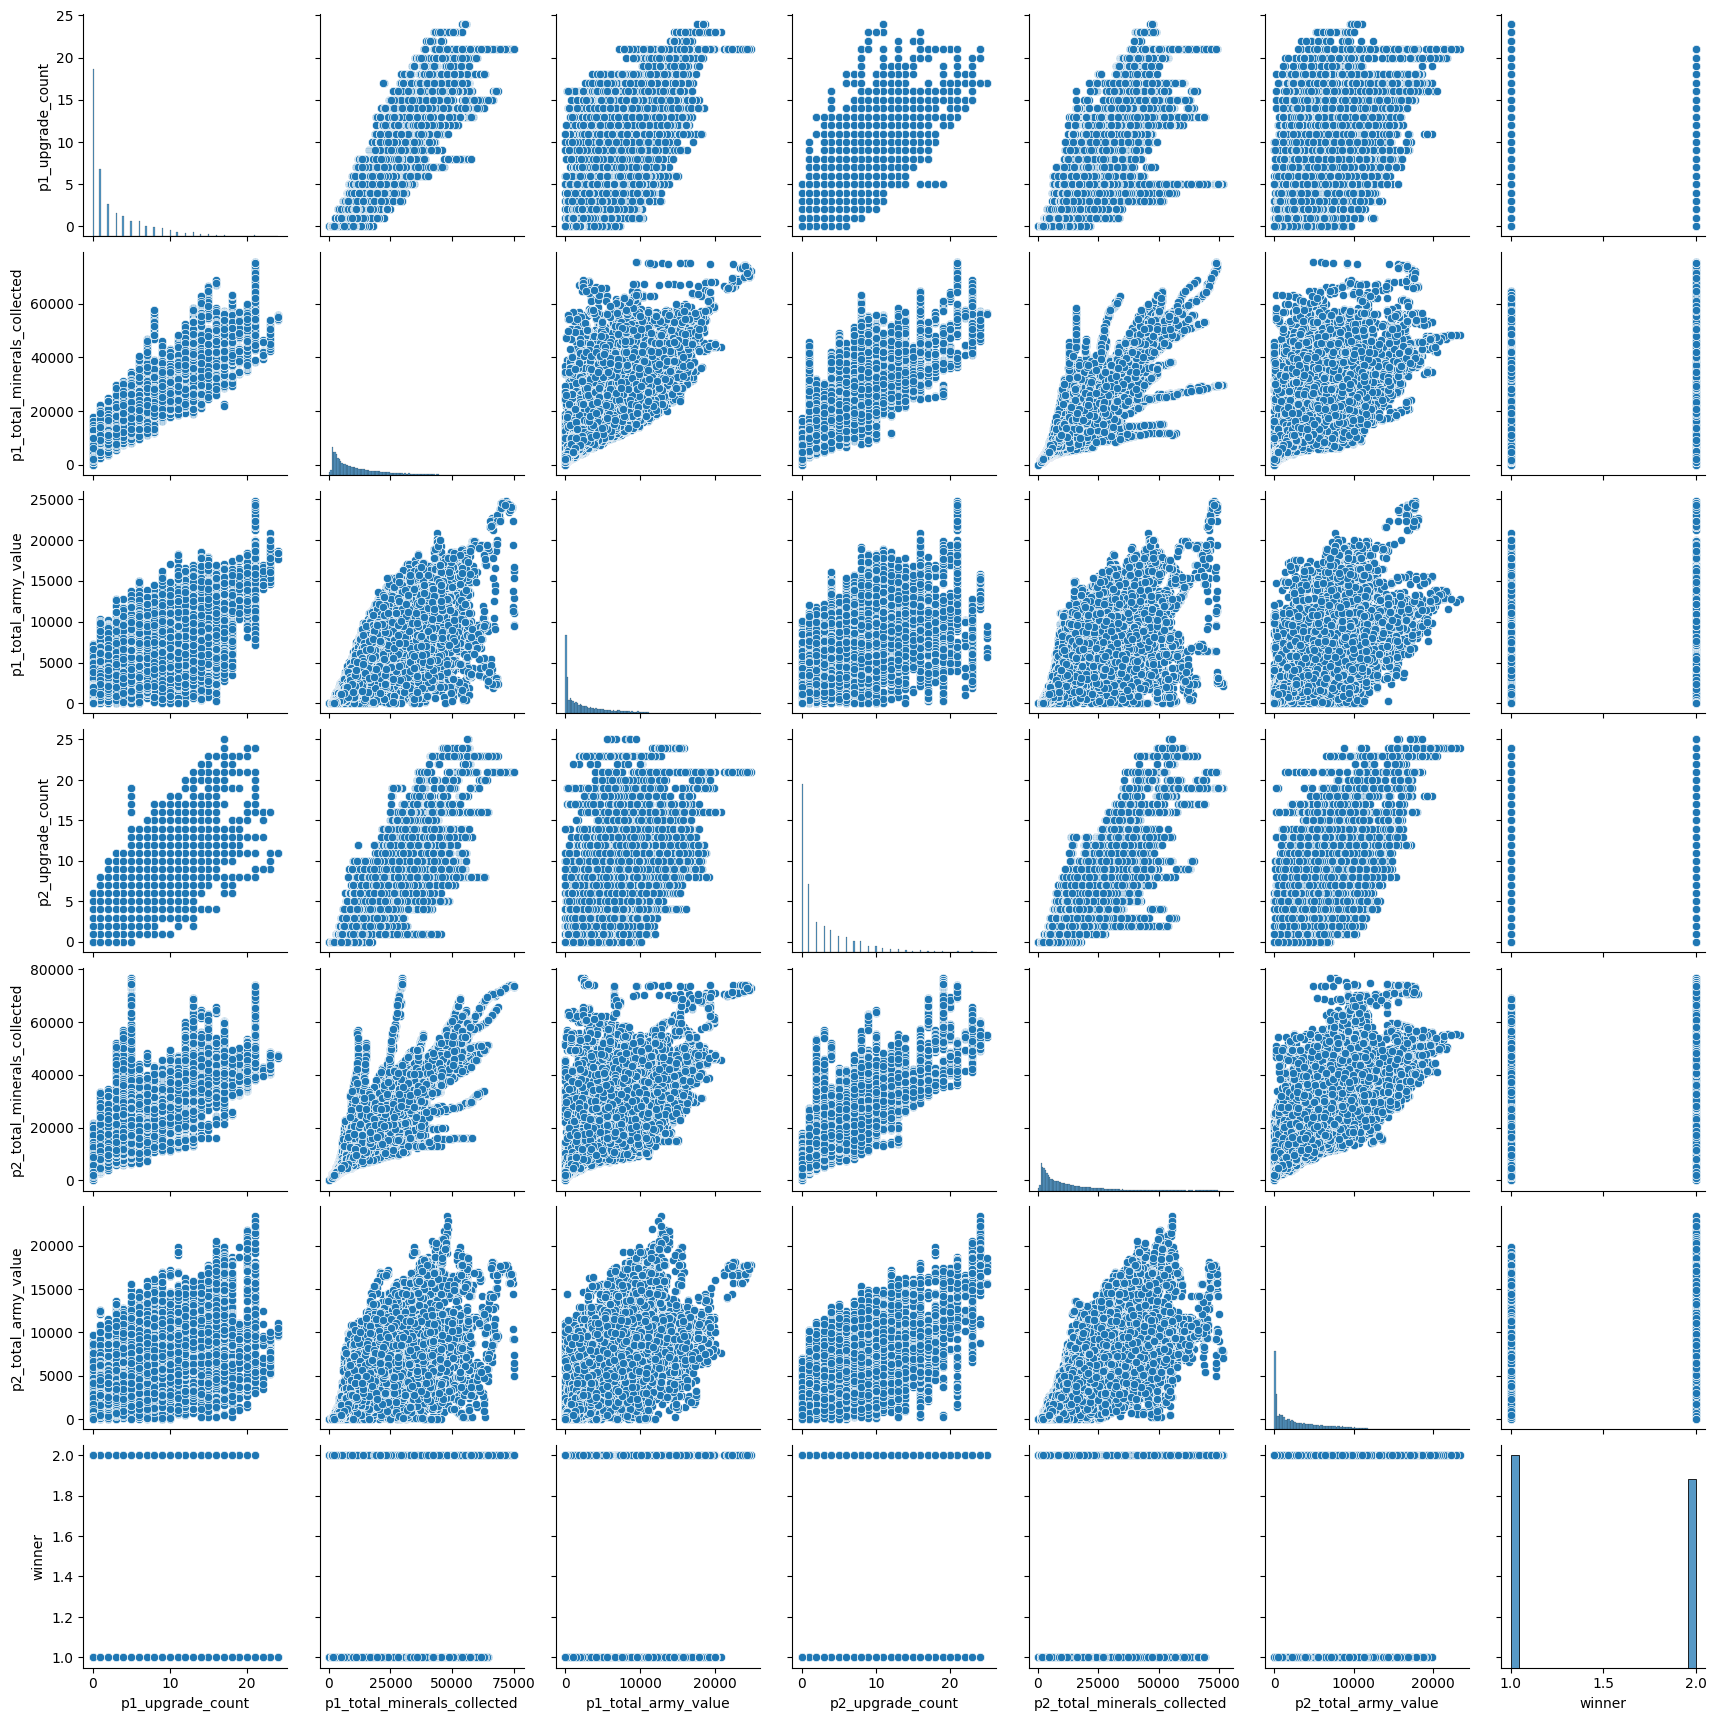

In [33]:
sea.pairplot(train_model1_df)

This plot confirms a lot of what we already probably know. If player one loses the game, they tend to have collected fewer resources, built fewer upgrades, and build smaller armies. Theres strong correlations between the army values for player 1 and player 2. The predictor here is likely time, since both parties will likely build larger armies as the game goes on. Lets look more closely at this relationship.

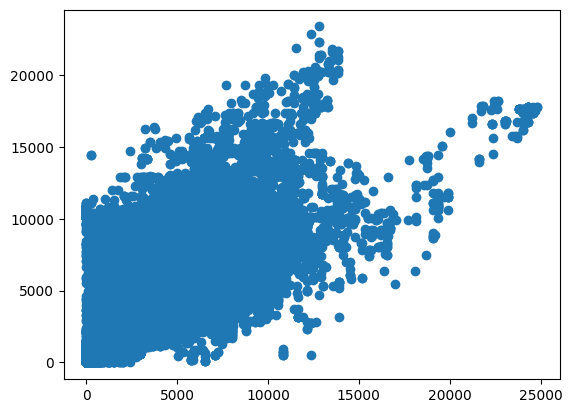

In [46]:
plt_data = train_model1_df[train_model1_df["winner"]==2][["p1_total_army_value", "p2_total_army_value"]]

plt.pyplot.scatter(plt_data["p1_total_army_value"], plt_data["p2_total_army_value"])

In [ ]:
qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()

qda.fit(train_model1_df[model_1_features], train_model1_df[model_1_label])

c:\Users\kayleb\school\Machine Learning Project\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis()

In [68]:
import sklearn.metrics


preds = qda.predict(test_df[model_1_features])
matt_coeff = sklearn.metrics.matthews_corrcoef(test_df[model_1_label], preds)
accuracy = sklearn.metrics.accuracy_score(test_df[model_1_label], preds)
print(f"""
        Full Game Matt's Coeff: {matt_coeff}
        Full Game Accuracy:     {accuracy}
      """)

lategame_gametime = 10000
preds = qda.predict(test_df[test_df["gametime"] >= lategame_gametime][model_1_features])
matt_coeff = sklearn.metrics.matthews_corrcoef(test_df[test_df["gametime"] >= lategame_gametime][model_1_label], preds)
accuracy = sklearn.metrics.accuracy_score(test_df[test_df["gametime"] >= lategame_gametime][model_1_label], preds)
print(f"""
        Late Game Matt's Coeff: {matt_coeff}
        Late Game Accuracy:     {accuracy}
      """)


        Full Game Matt's Coeff: 0.23680516946515962
        Full Game Accuracy:     0.6084451360558523
      

        Late Game Matt's Coeff: 0.40019688376905876
        Late Game Accuracy:     0.701309083641451
      
